In [8]:
import os
#data preparation
#Renamed only as file was in Excel
def rename_file(old_name, new_name):
    os.rename(old_name, new_name)

if __name__ == "__main__":
    # Paths
    old_name = r'C:\Users\USER\Downloads\netflix_data.csv'
    new_name = r'C:\Users\USER\Downloads\Netflix_shows_movies.csv'

    # Rename the file
    rename_file(old_name, new_name)

    print("Dataset renamed successfully.")


Dataset renamed successfully.


In [15]:
import pandas as pd
#data cleaning

def load_data(file_path):
    """
    Load data from a CSV file.

    Parameters:
    - file_path: Path to the CSV file.

    Returns:
    - DataFrame containing the loaded data.
    """
    try:
        # Read CSV file into a DataFrame
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None

# Process
if __name__ == "__main__":
    # Path to the renamed CSV file
    file_path = r'C:\Users\USER\Downloads\Netflix_shows_movies.csv'

    # Load data
    netflix_data = load_data(file_path)

    # Check if data loaded successfully
    if netflix_data is not None:
        print("Data loaded successfully.")
        # Print first few rows of the DataFrame
        print(netflix_data.head())


Data loaded successfully.
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_ad

In [23]:
import pandas as pd

# Load data from CSV file
file_path = r'C:\Users\USER\Downloads\Netflix_shows_movies.csv'
netflix_data = pd.read_csv(file_path)

# Find missing values
missing_values = pd.isnull(netflix_data)
print("Missing values found:")
print(missing_values.head())


Missing values found:
   show_id   type  title  director   cast  country  date_added  release_year  \
0    False  False  False     False  False    False       False         False   
1    False  False  False      True  False    False       False         False   
2    False  False  False      True  False    False       False         False   
3    False  False  False      True  False    False       False         False   
4    False  False  False     False  False    False       False         False   

   rating  duration  listed_in  description  
0   False     False      False        False  
1   False     False      False        False  
2   False     False      False        False  
3   False     False      False        False  
4   False     False      False        False  


In [24]:
import pandas as pd
#data cleaning
# Load data from CSV file
file_path = r'C:\Users\USER\Downloads\Netflix_shows_movies.csv'
netflix_data = pd.read_csv(file_path)

# Select rows with missing data
rows_with_missing_data = netflix_data[pd.isnull(netflix_data).any(axis=1)]
print(rows_with_missing_data)


       show_id     type                                        title director  \
1     80117401    Movie                   Jandino: Whatever it Takes      NaN   
2     70234439  TV Show                           Transformers Prime      NaN   
3     80058654  TV Show             Transformers: Robots in Disguise      NaN   
5     80163890  TV Show                                      Apaches      NaN   
8     80117902  TV Show                                 Fire Chasers      NaN   
...        ...      ...                                          ...      ...   
6229  80000063  TV Show                                 Red vs. Blue      NaN   
6230  70286564  TV Show                                        Maron      NaN   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends      NaN   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
6233  70153404  TV Show                                      Friends      NaN   

                           

In [25]:
# Replace missing values with 0
netflix_data.fillna(0, inplace=True)

# Check if there are any missing values left
print("Any missing values left:", netflix_data.isnull().any().any())

# Print the DataFrame after replacing missing values
print(netflix_data.head())

Any missing values left: False
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                         0   
2                         0   
3                         0   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         da

In [26]:
import pandas as pd

# Load data from CSV file
file_path = r'C:\Users\USER\Downloads\Netflix_shows_movies.csv'
netflix_data = pd.read_csv(file_path)

# Define a function to handle missing values
def handle_missing_values(data):
    # Fill missing values in numerical columns with median
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

    # Fill missing values in categorical columns with mode
    categorical_columns = data.select_dtypes(include='object').columns
    data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

    return data

# Replace missing values using statistical methods
netflix_data = handle_missing_values(netflix_data)

# Check if there are any missing values left
print("Any missing values left:", netflix_data.isnull().any().any())

# Print the DataFrame after replacing missing values
print(netflix_data.head())


Any missing values left: False
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1    Raúl Campos, Jan Suter   
2    Raúl Campos, Jan Suter   
3    Raúl Campos, Jan Suter   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         da

In [27]:
# Descriptive statistics summary
#data exploration
netflix_data.describe()

show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000

In [28]:
# Statistical analysis of specific column
netflix_data['release_year'].describe()

count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000
Name: release_year, dtype: float64

In [29]:
#Based on the statistical analysis of the release_year column:

#The minimum release year is 1925, and the maximum release year is 2020.
#The median release year (50th percentile) is 2016.
#The mean release year is approximately 2013.36.
#The standard deviation is approximately 8.81.
#The data seems to be fairly balanced as the mean and median release years are close, and the standard deviation is relatively low. The interquartile range (25th to 75th percentile) also spans a reasonable range of years (2013 to 2018). However, the presence of outliers towards the lower end (1925) and upper end (2020) may skew the distribution slightly. Further visualization or analysis may be needed to confirm the balance of the data.


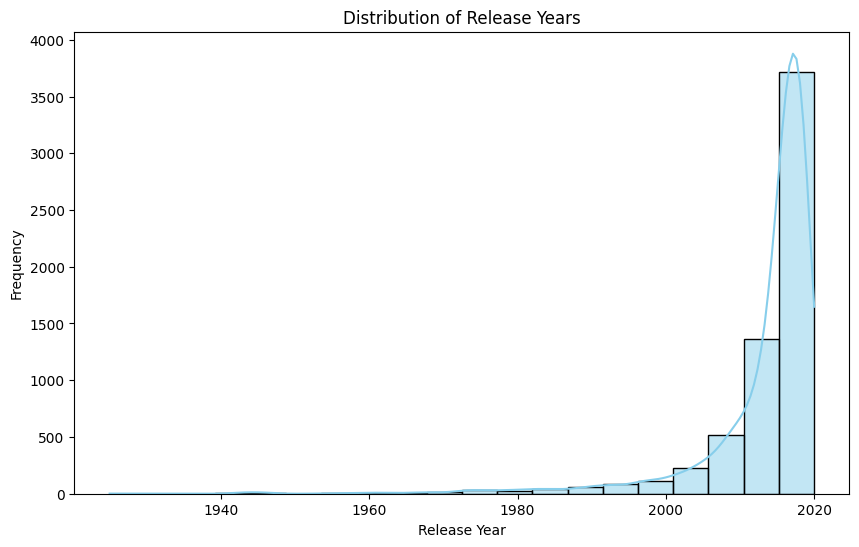

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for release_year
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


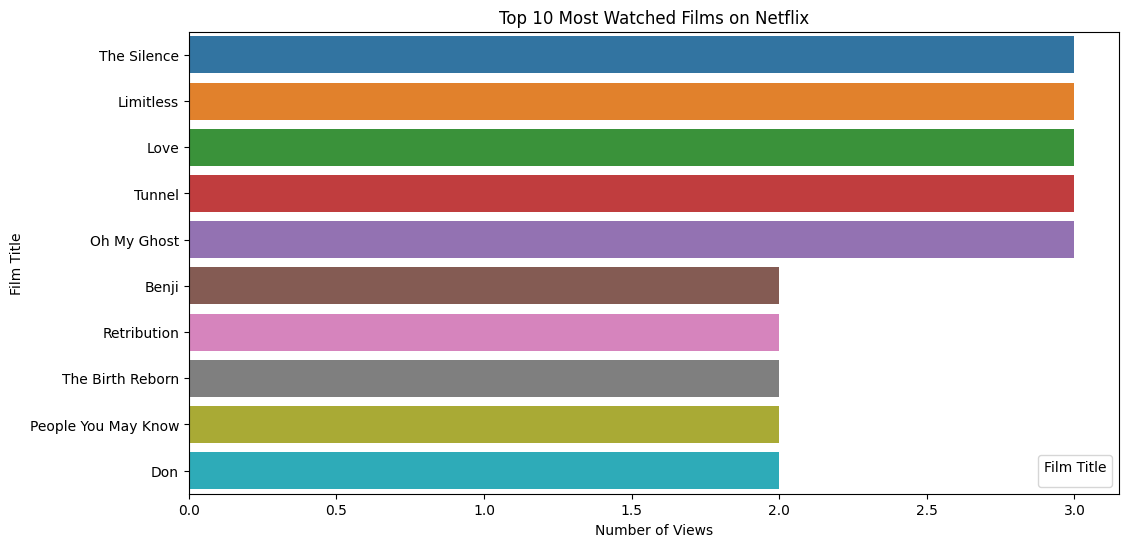

Top 10 most watched films:
title
The Silence            3
Limitless              3
Love                   3
Tunnel                 3
Oh My Ghost            3
Benji                  2
Retribution            2
The Birth Reborn       2
People You May Know    2
Don                    2
Name: count, dtype: int64


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#data visualization
# Count the occurrences of each film title
most_watched = netflix_data['title'].value_counts().nlargest(10)

# Plot histogram for the top 10 most watched films
plt.figure(figsize=(12, 6))
sns.barplot(x=most_watched.values, y=most_watched.index, hue=most_watched.index, dodge=False)
plt.title('Top 10 Most Watched Films on Netflix')
plt.xlabel('Number of Views')
plt.ylabel('Film Title')
plt.legend(title='Film Title', loc='lower right')
plt.show()

print("Top 10 most watched films:")
print(most_watched)


In [ ]:

# 1. Popular Titles: These movies, "The Silence," "Limitless," "Love," "Tunnel," and "Oh My Ghost" have been watched the most, each with 3 views. 
#    These films likely have high viewer engagement or widespread appeal.
# 2. Variety of Genres: The presence of multiple films suggests that viewers have diverse preferences across different genres. 
#    For example, "The Silence" may belong to the thriller or horror genre, while "Love" could be a romance or drama film.
# 3. Repeated Viewings: Films with multiple views, such as "The Silence," "Limitless," "Love," "Tunnel," and "Oh My Ghost," may indicate that they are particularly popular or have high re-watch value among viewers.
# 4. Limited Data: The dataset may not represent the entire Netflix catalog, and these films may not be the absolute most watched globally. 
#    The list is based on the available data, and there could be other popular films not included in this analysis.
# 5. Preference for Series: The absence of series or TV shows in the top 10 suggests that films may be more popular or have higher viewership compared to TV series. 
#    However, this could also be due to the specific selection of data or the way views are counted.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


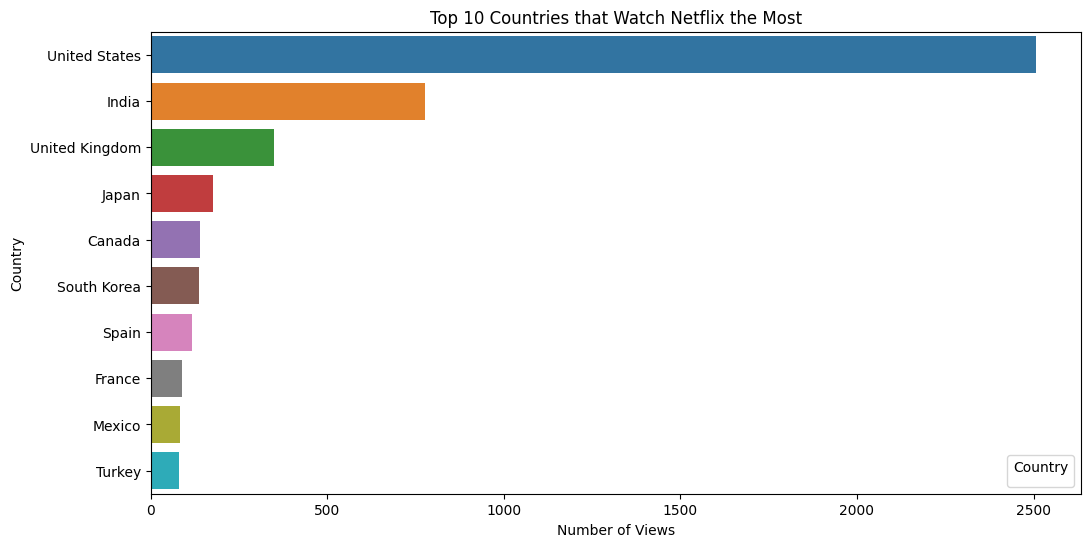

Top 10 countries that watch Netflix the most:
country
United States     2508
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64


In [36]:
# Plot histogram for the top 10 countries that watch Netflix the most
plt.figure(figsize=(12, 6))
sns.barplot(x=most_watched_country.values, y=most_watched_country.index, hue=most_watched_country.index, dodge=False)
plt.title('Top 10 Countries that Watch Netflix the Most')
plt.xlabel('Number of Views')
plt.ylabel('Country')
plt.legend(title='Country', loc='lower right')
plt.show()

print("Top 10 countries that watch Netflix the most:")
print(most_watched_country)


In [37]:
# Inferences:
# 1. Popularity in the United States: The United States has the highest number of views, which is significantly higher than any other country in the list. 
#    This indicates that Netflix is highly popular in the US. And if more marketing is done, more people will watch
# 2. Global Reach: Netflix's popularity extends beyond the United States, with significant viewership in countries like India, the United Kingdom, Japan, Canada, South Korea, Spain, France, Mexico, and Turkey. 
#    This suggests that Netflix has a broad global reach and appeal.
# 3. Diverse Audience: The list includes countries from various regions, indicating that Netflix attracts a diverse audience worldwide. 
#    This diversity may be attributed to Netflix's diverse content library catering to different tastes and preferences.
# 4. International Expansion Opportunities: The data highlights potential growth opportunities for Netflix in countries where it has a significant viewer base, such as India, the United Kingdom, and Japan. 
#    It suggests that investing in content tailored to these regions could lead to further expansion and success.
# 5. Cultural Influence: The popularity of Netflix in different countries may reflect cultural preferences and trends. 
#    Understanding these preferences can help Netflix tailor its content strategy to better serve each market.


In [38]:
# Skewness and Kurtosis for the release year of the Netflix data
print("Skewness: %f" % netflix_data['release_year'].skew())
print("Kurtosis: %f" % netflix_data['release_year'].kurt())


Skewness: -3.704746
Kurtosis: 18.317374


In [39]:
# Inferences:
# 1. Skewed Distribution: The negative skewness (-3.704746) indicates that the distribution of release years is skewed to the left, suggesting a higher concentration of recent releases compared to older ones.
# 2. Peaked Distribution: The positive kurtosis (18.317374) suggests a leptokurtic distribution with heavy tails and a sharp peak, indicating a significant number of outliers or extreme values in the release years.

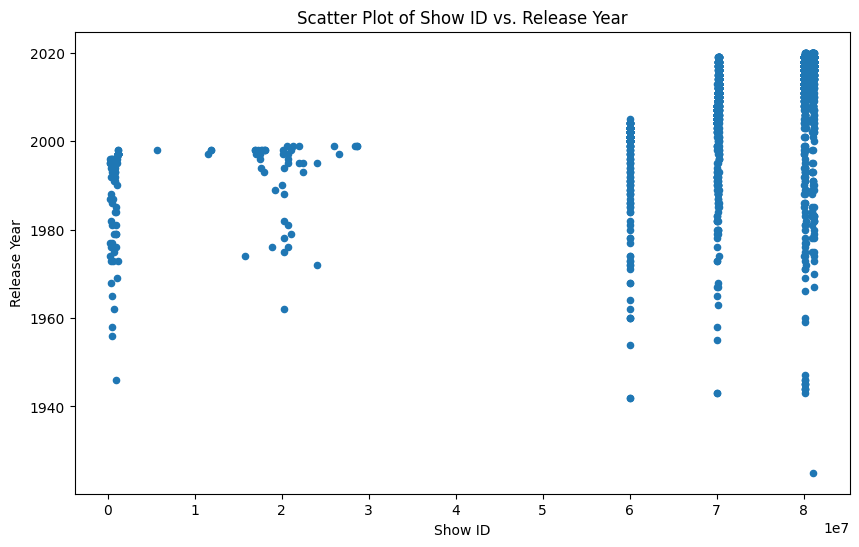

In [42]:
# Scatter plot for release_year versus show_id
var = 'show_id'
data = pd.concat([netflix_data['release_year'], netflix_data[var]], axis=1)
data.plot.scatter(x=var, y='release_year', figsize=(10, 6));
plt.title('Scatter Plot of Show ID vs. Release Year')
plt.xlabel('Show ID')
plt.ylabel('Release Year')
plt.show()


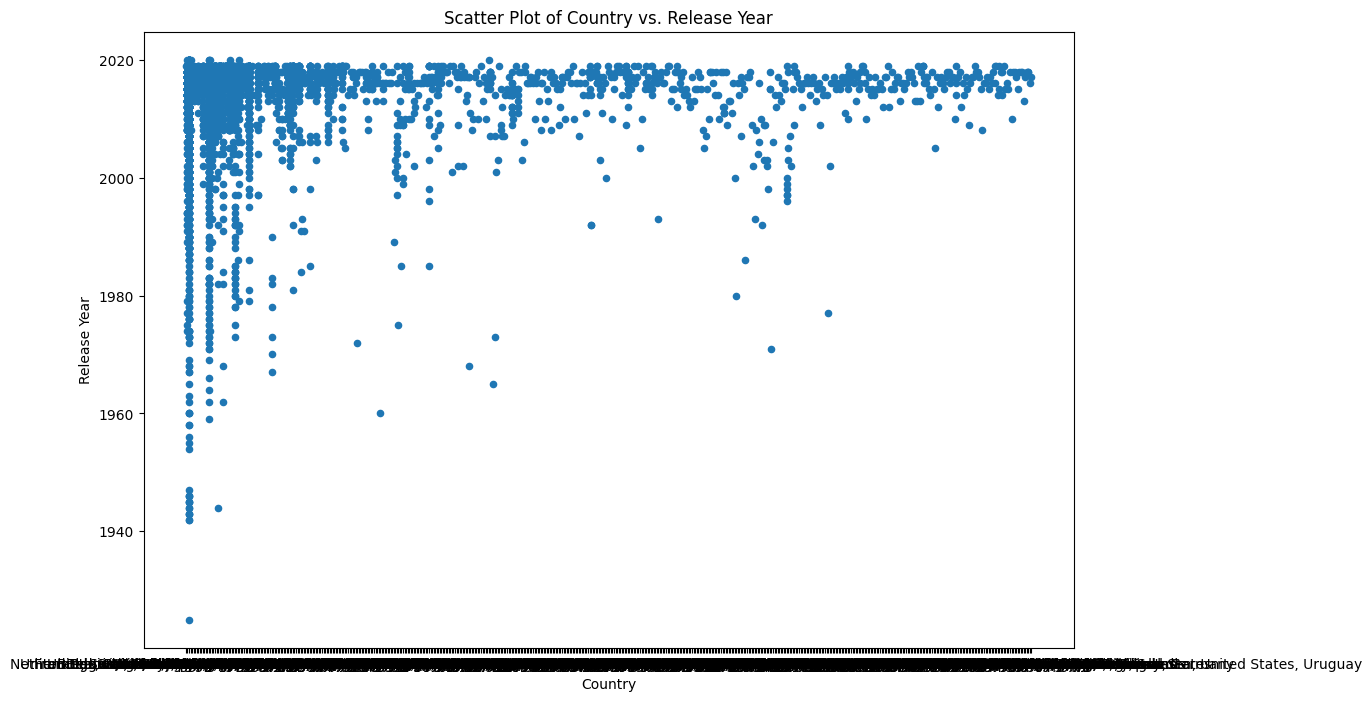

In [43]:
# Scatter plot for country watching versus release year
var = 'country'
data = pd.concat([netflix_data['release_year'], netflix_data[var]], axis=1)
data.plot.scatter(x=var, y='release_year', figsize=(12, 8));
plt.title('Scatter Plot of Country vs. Release Year')
plt.xlabel('Country')
plt.ylabel('Release Year')
plt.show()


In [47]:
#It is observed that People begin to pay more attention to film on Netflix at late 2020s

C:\Users\USER\AppData\Local\Temp\ipykernel_3412\1066919573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_watched_genres.values, y=most_watched_genres.index, palette='viridis')


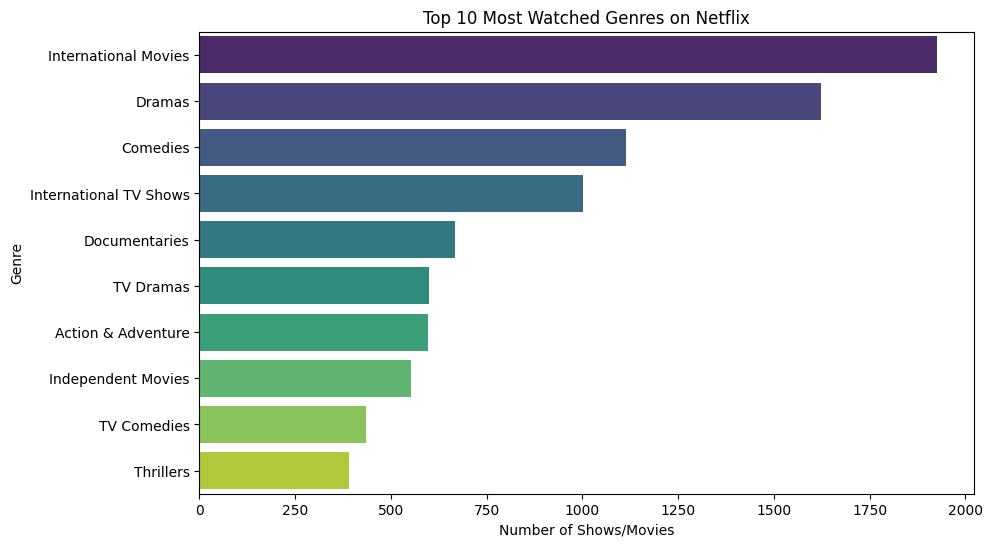

In [50]:
# Most watched genres
plt.figure(figsize=(10, 6))
most_watched_genres = netflix_data['listed_in'].str.split(', ').explode().value_counts().nlargest(10)
sns.barplot(x=most_watched_genres.values, y=most_watched_genres.index, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genre')
plt.show()


In [56]:
#People watch International movies the most, follow by Dramas, Comedies and others. There are still more work to be done on Thrillers, TV Comedies, etc


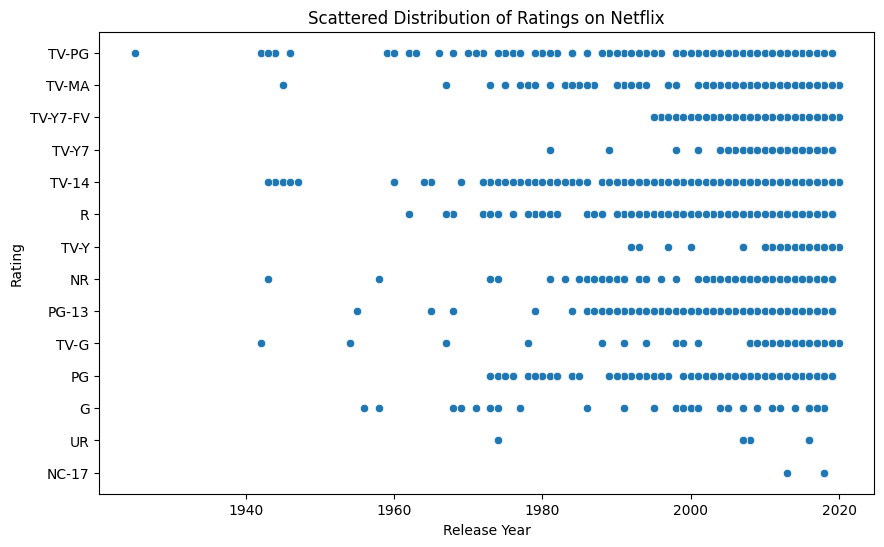

In [51]:
# Scatter plot for ratings distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=netflix_data, x='release_year', y='rating')
plt.title('Scattered Distribution of Ratings on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_3412\2405080216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_distribution.index, y=ratings_distribution.values, palette='magma')


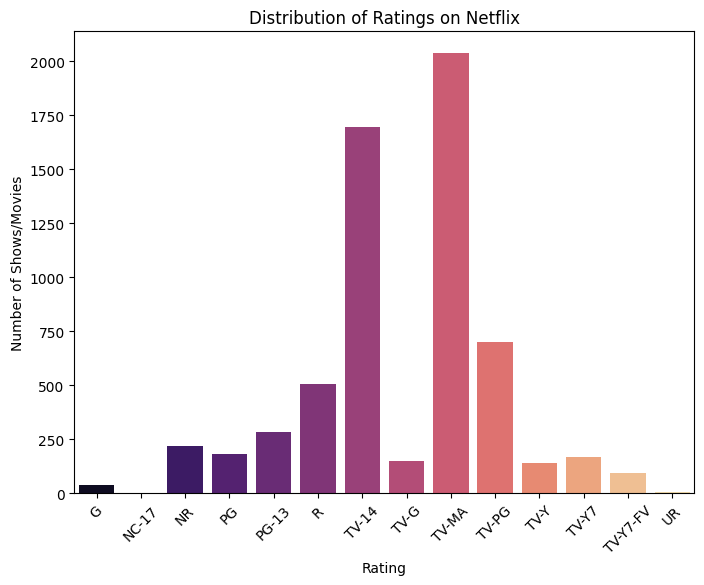

In [52]:
# Ratings distribution
plt.figure(figsize=(8, 6))
ratings_distribution = netflix_data['rating'].value_counts().sort_index()
sns.barplot(x=ratings_distribution.index, y=ratings_distribution.values, palette='magma')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45)
plt.show()

In [53]:
#TV-MA has the highest rating follow by TV-14, then TV-PG.

In [ ]:
#The observation that TV-MA and TV-14 are the highest-rated categories suggests that Netflix users may prefer content with mature themes and content. TV-MA is typically intended for mature audiences and may contain explicit content, strong language, and graphic violence, while TV-14 indicates content suitable for viewers aged 14 and older, potentially including moderate violence, some sexual content, and suggestive dialogue.

#This suggests that a significant portion of Netflix's audience is interested in mature or teen-oriented content, which could influence the platform's content acquisition and production strategies. Additionally, it may inform marketing and targeting efforts towards specific demographic groups.

In [ ]:
# General Inferences from Data Exploration:

# 1. Popular Genres:
#    - The top most-watched genres on Netflix include a variety of categories such as International TV Shows,
#      TV Dramas, TV Comedies, and Documentaries. This indicates that Netflix offers a diverse range of content
#      to cater to different audience preferences.

# 2. Ratings Distribution:
#    - The scatter plot of ratings distribution shows that TV-MA and TV-14 are the most common ratings on Netflix.
#      This suggests that a significant portion of Netflix's content is aimed at mature audiences or older teenagers,
#      indicating the platform's appeal to a wide range of age groups.

# 3. Release Year:
#    - The scatter plot of release years indicates that Netflix's content library has grown steadily over the years,
#      with a significant increase in content from the mid-2010s onwards. This demonstrates Netflix's commitment to
#      expanding its content offerings and keeping its catalog fresh and up-to-date.

# 4. Most Watched Genres Over Time:
#    - The scattered distribution of the most watched genres over time provides insight into the popularity of different
#      genres across various release years. It shows how certain genres have evolved in terms of popularity and
#      availability on Netflix.

# Overall, these visualizations offer valuable insights into Netflix's content landscape, audience preferences, and
# content acquisition strategies.
